In this task, we will try to guess whether the patient has cancer or not using ANNs with tensorflow. The visualizations will be provided with tensorboard. Firstly, I will import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from datetime import datetime

Let's read the data and look what we have.

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


We see that we will have 30 columns for feature and 1 column for the label. Later when we split the data, we will make sure to divide it in X and y. Let's dive into our data more carefully. Below we will see that our features are of data type of float and the label is of data type of integer.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

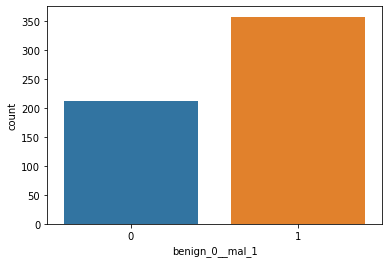

In [4]:
sns.countplot(x='benign_0__mal_1',data=df)

Above we see how is our data divided. Clearly our data is not balanced which is fine. Now, I would like to see if there is a strong or weak correlation among the features and also between the features and the label. By doing so, we get a better insight on our data. I will use a heatmap from matplotlib but one can simply print it as well. 

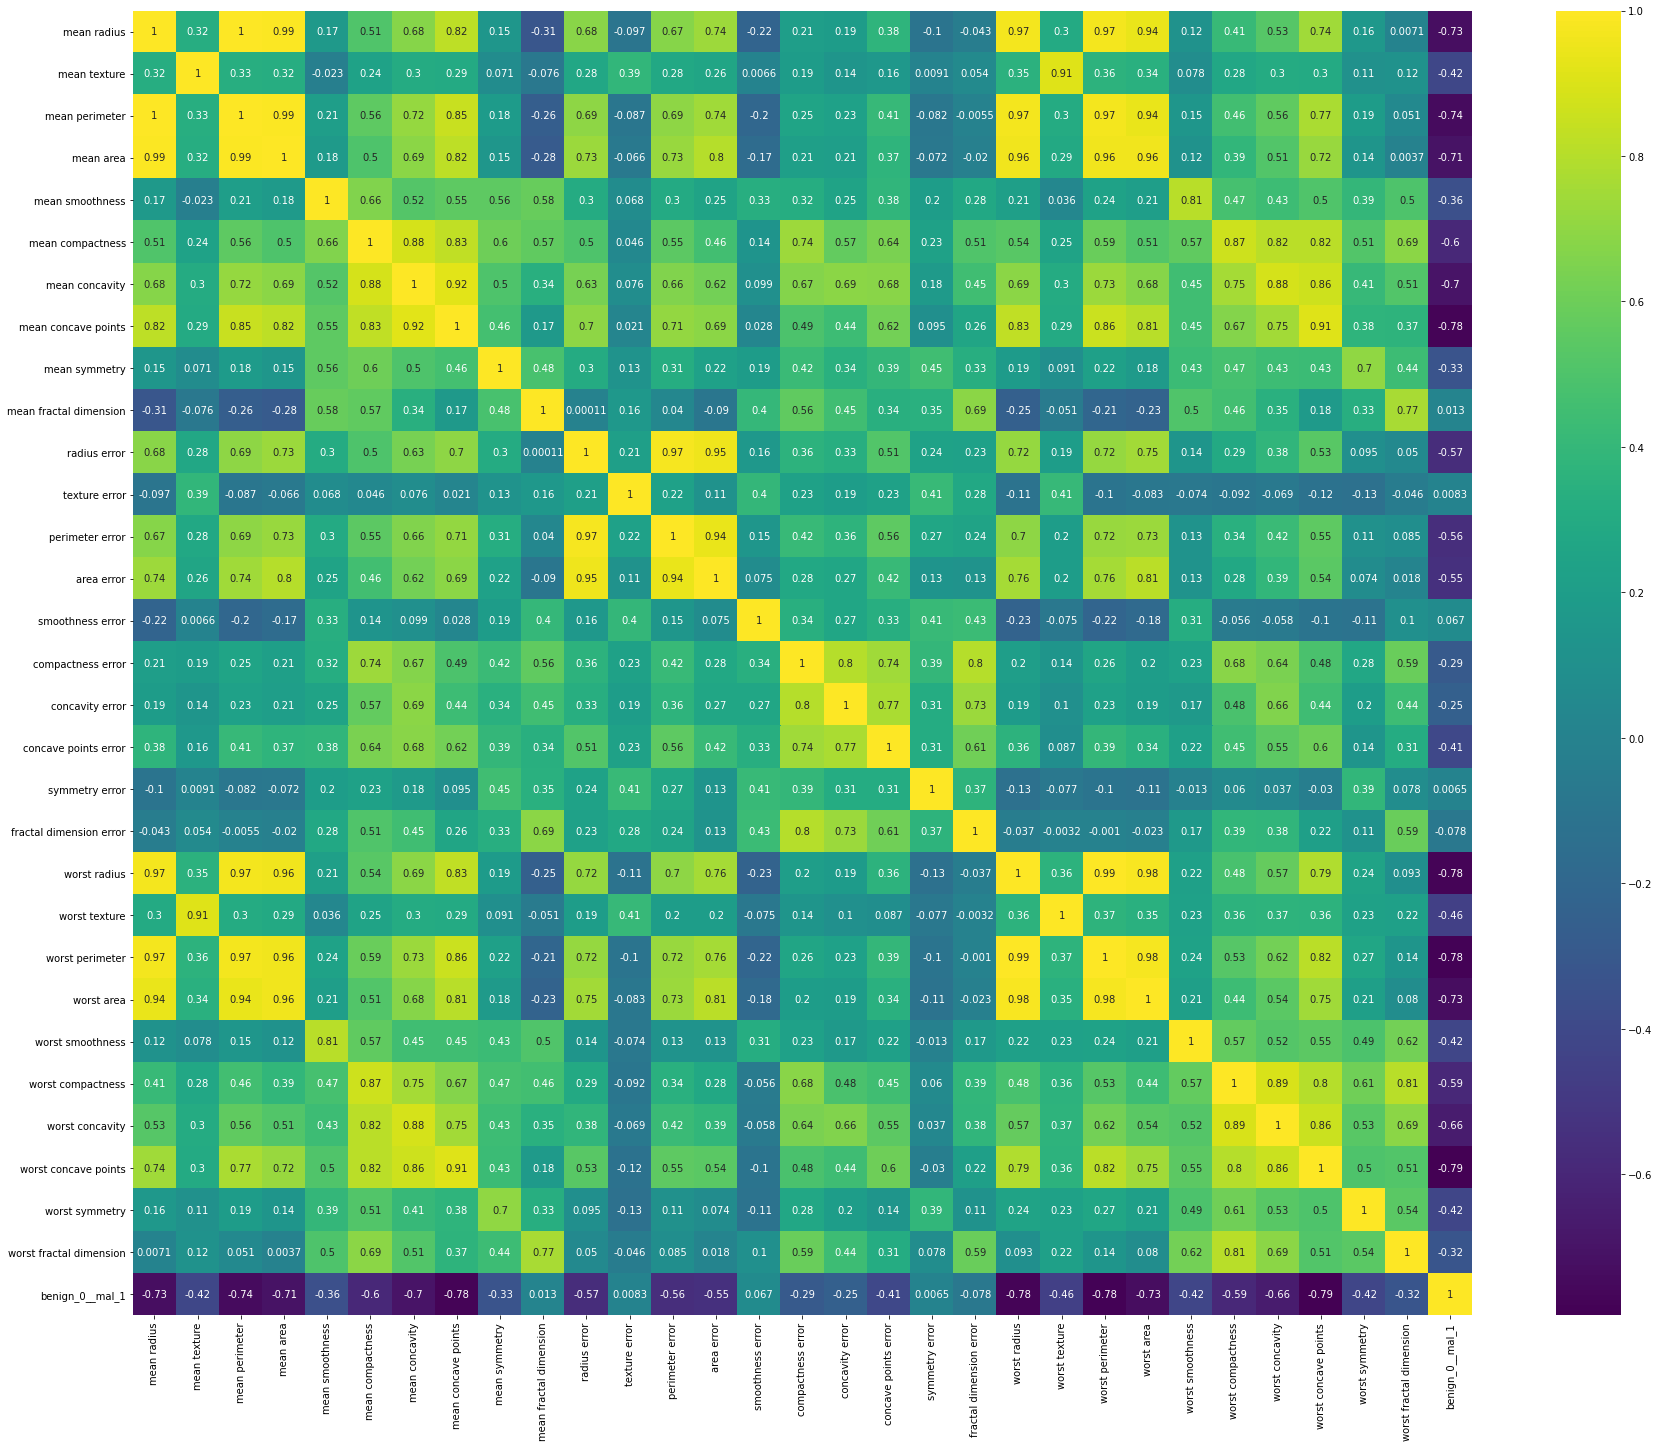

In [5]:
plt.figure(figsize=(30,24))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

What do we see here ? There are a lot of comments that can be done from the correlation map. However, what I am paying attention the most is the fact that there are only a few positive correlations between the features and the label. The positive correlations are extremely close to 0. One can simply try to limit the features using the correlation map to fasten the process but I will not do that here.
Below, I will use the scatterplots from seaborn library between some features and the label. Lastly, I will do a scatterplot between worst area and area error to show how would a scatterplot look like If we had a correlation of 0.81 which is a positive number and close to 1.

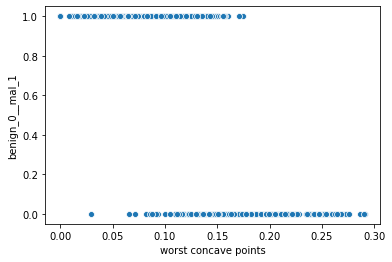

In [6]:
sns.scatterplot(x='worst concave points',y='benign_0__mal_1',data=df,)

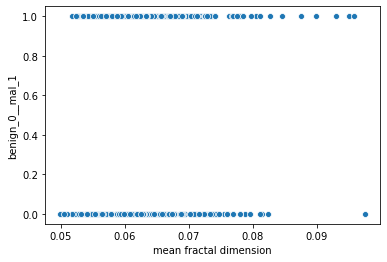

In [7]:
sns.scatterplot(x='mean fractal dimension',y='benign_0__mal_1',data=df,)

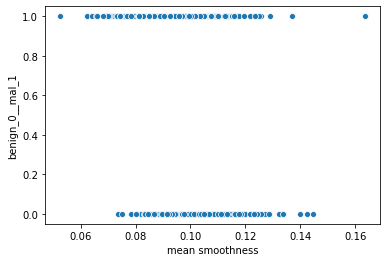

In [8]:
sns.scatterplot(x='mean smoothness',y='benign_0__mal_1',data=df,)

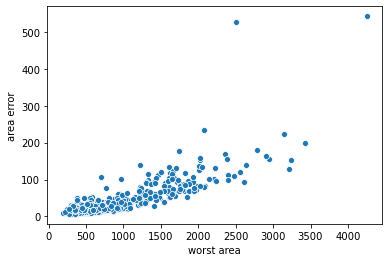

In [9]:
sns.scatterplot(x='worst area',y='area error',data=df,)

Now I would like to check If there are any None values in our dataset. I know that it does not include any None values. One can simply remove the None values in the case that the None values are not the majority of the dataset.

In [10]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

Now I will do the train test split and later start with ML.

In [11]:
X = df.drop('benign_0__mal_1',axis=1)
y = df['benign_0__mal_1']

In [12]:
print("X:",X.head())
print("y:", y.head())

X:    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0        

To be able to feed our data in the NN we need to have the values not the dataframe. Therefore, we will convert X and y to:

In [13]:
X = X.values
y = y.values

I will use 75% for training purposes and 25% for testing purposes. The splitting will be done randomly.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

No we will do scaling. Scaling is an important process but there is one thing to watch out for. One must fit the MinMaxScaler with the training data and later transform both training and test data accordingly. If one fits the MinMaxScaler on the test data, it might lead to overfitting.

In [15]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

I will also call EarlyStopping from Keras. EarlyStopping is used to stop training when a monitored metric has stopped improving. There are various parameters that can be set which are discussed here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [16]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Below, I will activate the tensorboard which is an awesome tool to monitor the whole process of your Neural Network. To do so, I will set a path to store the log file and than later go to my terminal and call it.

In [17]:
log_directory = 'logs\\fit'

In [18]:
board = TensorBoard(log_dir=log_directory,histogram_freq=1, write_graph=True, write_images=True,
    update_freq='epoch',profile_batch=2,embeddings_freq=1)

Finally we need to create our model. In this model, one can realize that I use dropout layers to avoid overfitting. As loss function I will usebinary_crossentropy since our labels are either 0 or 1. In addition, adam optimizer is used which is a very common practice.

In [19]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

I will train the model while calling earlystop with which we will see that we did not really need all the epochs that will be set.

In [20]:
model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_test, y_test), verbose=1,callbacks=[early_stop,board])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.7380 - val_loss: 0.6999
Epoch 2/600
426/426 [==============================] - 0s 133us/sample - loss: 0.7023 - val_loss: 0.6698
Epoch 3/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6735 - val_loss: 0.6386
Epoch 4/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6465 - val_loss: 0.6007
Epoch 5/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6173 - val_loss: 0.5589
Epoch 6/600
426/426 [==============================] - 0s 155us/sample - loss: 0.5910 - val_loss: 0.5160
Epoch 7/600
426/426 [==============================] - 0s 138us/sample - loss: 0.5657 - val_loss: 0.4781
Epoch 8/600
426/426 [==============================] - 0s 124us/sample - loss: 0.5423 - val_loss: 0.4416
Epoch 9/600
426/426 [==============================] - 0s 140us/sample - loss: 0.5007 - val_loss: 0.4100
Epoch 10/60

In [23]:
# Run this in the terminal for tensorboard:
# - > tensorboard --logdir logs\fit 